# SD-TSIA 204
# Statistics: linear models

# TP 2 : Linear regression 

## By El arji Hamza

## Imports

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from scipy.stats import t
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## format the filename 

In [4]:
# import os

# # Replace the following variables with your first and last name
# first_name = "Hamza"
# last_name = "El Arji"

# # Construct the new filename
# lab_name = "SD-TSIA204_lab2"
# formatted_first_name = first_name.strip().lower()
# formatted_last_name = last_name.strip().lower()

# # Join components to create the new filename
# new_filename = f"{lab_name}_{formatted_last_name}_{formatted_first_name}.ipynb"

# # Retrieve the current file path
# current_filepath = (
#     "C:\\Users\\hamza\\OneDrive\\Bureau\\2A\\2p2\\sd-tsia204\\TP2\\"
#     "Hamza El arji.ipynb"
# )

# # Construct the new file path with the new name
# new_filepath = os.path.join(os.path.dirname(current_filepath), new_filename)

# # Rename the file
# os.rename(current_filepath, new_filepath)


## PART 1 


**1.For the first question, we load a standard dataset from sklearn.datasets named fetch_california_housing. This dataset has only p = 8 variables.**

In [5]:
# Load the California housing dataset
california_housing = fetch_california_housing()

print("Dataset Description:", california_housing.DESCR)

Dataset Description: .. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

Thi

**1.a  Estimate the coefficients with the expression of the normal equaitons seen in class. Code two functions to compute the MSE and the R2 coefficient and compare them with the version of sklearn for the train and the test sets.**

In [6]:
# Extract features (X) and target variable (y)
X, y = california_housing.data, california_housing.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


def estimate_coefficients(X, y):
    """
    Add a column of ones to X for the intercept term and estimate coefficients
    using the normal equations.
    """
    X = np.c_[np.ones(X.shape[0]), X]
    coefficients = np.linalg.inv(X.T @ X) @ X.T @ y
    return coefficients


def compute_mse(y_true, y_pred):
    """ Compute Mean Squared Error """
    return np.mean((y_true - y_pred) ** 2)


def compute_r2(y_true, y_pred):
    """ Compute R-squared """
    ss_residual = np.sum((y_true - y_pred) ** 2)
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    r2 = 1 - (ss_residual / ss_total)
    return r2


# Estimate the coefficients using the normal equations
coefficients = estimate_coefficients(X_train, y_train)

# Compute the predictions for the train and test sets
y_train_pred = np.dot(np.c_[np.ones(X_train.shape[0]), X_train], coefficients)
y_test_pred = np.dot(np.c_[np.ones(X_test.shape[0]), X_test], coefficients)

# Train set with sklearn's implementation
sklearn_lr = LinearRegression()
sklearn_lr.fit(X_train, y_train)
sklearn_y_train_pred = sklearn_lr.predict(X_train)

# Test set with sklearn's implementation
sklearn_y_test_pred = sklearn_lr.predict(X_test)

# Compare MSE and R-squared for both implementations
print("Train Set:")
print("Custom MSE:", compute_mse(y_train, y_train_pred))
print("Sklearn MSE:", mean_squared_error(y_train, sklearn_y_train_pred))
print("Custom R-squared:", compute_r2(y_train, y_train_pred))
print("Sklearn R-squared:", r2_score(y_train, sklearn_y_train_pred))

print("\nTest Set:")
print("Custom MSE:", compute_mse(y_test, y_test_pred))
print("Sklearn MSE:", mean_squared_error(y_test, sklearn_y_test_pred))
print("Custom R-squared:", compute_r2(y_test, y_test_pred))
print("Sklearn R-squared:", r2_score(y_test, sklearn_y_test_pred))


Train Set:
Custom MSE: 0.5179331255246699
Sklearn MSE: 0.5179331255246696
Custom R-squared: 0.6125511913966952
Sklearn R-squared: 0.6125511913966953

Test Set:
Custom MSE: 0.5558915986954819
Sklearn MSE: 0.5558915986952425
Custom R-squared: 0.5757877060322695
Sklearn R-squared: 0.5757877060324521


+ The custom functions for MSE and R² provide results that are in excellent agreement with the results from scikit-learn's functions. This validates the correctness of the custom implementation. 

+ The slight discrepancies between the custom and sklearn results are negligible and can be attributed to the precision limits of floating-point calculations in Python.

+ The MSE for the test set using the custom function is approximately 0.5559, which is a bit higher than the training set MSE. This is expected since models generally perform slightly worse on the test set.


**1.b Finally, give the confidence intervals at level 99% for all the coefficients coding the expression for the CI seen in session 3.**


In [7]:
# Assuming a Gaussian model, with the kernel of X being {0} and n > p + 1,
# we compute the standard errors of the coefficients.

# Add intercept to X
x_with_intercept = np.c_[np.ones(X.shape[0]), X]

# Compute inverse of X^T * X
xtx_inverse = np.linalg.inv(x_with_intercept.T @ x_with_intercept)

# Calculate standard errors
standard_errors = np.sqrt(np.diagonal(xtx_inverse))

# Define alpha and degrees of freedom
alpha = 0.01
degrees_freedom = len(y_train) - X_train.shape[1] - 1

# Calculate the t-value for a 99% confidence level
t_value = t.ppf(1 - alpha / 2, degrees_freedom)

# Compute sigma
sigma = np.sqrt(np.sum((y_train - y_train_pred) ** 2) / degrees_freedom)

# Calculate confidence intervals based on the course material
lower_bounds = coefficients - t_value * standard_errors * sigma
upper_bounds = coefficients + t_value * standard_errors * sigma
print(coefficients)

# Print the confidence intervals for each coefficient
for i, coef in enumerate(coefficients):
    print(f"Coefficient {i}: [{lower_bounds[i]}, {upper_bounds[i]}]")


[-3.70232777e+01  4.48674910e-01  9.72425752e-03 -1.23323343e-01
  7.83144907e-01 -2.02962058e-06 -3.52631849e-03 -4.19792487e-01
 -4.33708065e-01]
Coefficient 0: [-38.71039387248385, -35.33616153834372]
Coefficient 1: [0.4379288861145488, 0.45942093322106287]
Coefficient 2: [0.008581547301767438, 0.010866967734301807]
Coefficient 3: [-0.13839301050525596, -0.10825367515565854]
Coefficient 4: [0.7111046487115497, 0.8551851648943806]
Coefficient 5: [-1.419006741564674e-05, 1.0130826256248276e-05]
Coefficient 6: [-0.004774356976484647, -0.00227827999782281]
Coefficient 7: [-0.4382202509140817, -0.4013647222478999]
Coefficient 8: [-0.4529962272341673, -0.414419902678422]


+ These intervals are based on the assumption that the errors are normally distributed and the sample size is large enough for the t-distribution to be approximated by the normal distribution.

+ The fact that most of the confidence intervals do not contain zero indicates that most of the features have a significant relationship with the target variable at the 99% confidence level. Except for the coefficient 5.

+ Some negative intervals suggest a negative relationship with the target variable, and the positive intervals suggest a positive relationship.



**2.For the rest of the TP, we use the dataset in eCampus data. Load and preprocess the data:**


In [8]:
# We import the data
df = pd.read_csv('data.csv', header=None)

# Display the description of the DataFrame
print("Dataset Description:")
print(df.describe())

Dataset Description:
                0             1             2           3             4    \
count  4.420000e+02  4.420000e+02  4.420000e+02  442.000000  4.420000e+02   
mean   1.004727e-17 -8.037814e-18  1.607563e-17    0.000000 -4.018907e-18   
std    1.001133e+00  1.001133e+00  1.001133e+00    1.001133  1.001133e+00   
min   -3.149247e+00 -2.862871e+00 -3.057543e+00   -2.856903 -3.102347e+00   
25%   -6.707870e-01 -7.128394e-01 -7.160981e-01   -0.671547 -6.732232e-01   
50%    3.819503e-02  6.217421e-02  4.739406e-02    0.000066 -6.111315e-03   
75%    6.748497e-01  6.244547e-01  6.975121e-01    0.688197  7.026457e-01   
max    2.547051e+00  2.567177e+00  2.965824e+00    3.057612  3.173713e+00   

                5             6             7           8             9    \
count  4.420000e+02  4.420000e+02  4.420000e+02  442.000000  4.420000e+02   
mean  -8.037814e-18  2.612289e-17  4.018907e-18    0.000000 -1.205672e-17   
std    1.001133e+00  1.001133e+00  1.001133e+00    1.0

**2.a Separate the data in train and test sets: save one fourth of the data as testing (train_test_split from sklearn.model_selection with the random seed set to 0 and standardize both the training and testing sets using the fit_transform and transform functions in sklearn.preprocessing.StandardScaler).**



In [9]:
# We import the data
df = pd.read_csv('data.csv', header=None)

# Assuming df is a DataFrame, separate features and target variable
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Separate the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0
)

# Standardize the training and testing sets
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)


In [25]:
# Calculate and print the mean and standard deviation of the standardized training set
mean_X_train_std = np.mean(X_train_std, axis=0)
std_X_train_std = np.std(X_train_std, axis=0)

print("Mean of standardized training set (should be close to 0):")
print(mean_X_train_std)
print("\nStandard deviation of standardized training set (should be close to 1):")
print(std_X_train_std)

# Calculate and print the mean and standard deviation of the standardized testing set
mean_X_test_std = np.mean(X_test_std, axis=0)
std_X_test_std = np.std(X_test_std, axis=0)

print("\nMean of standardized testing set (should be close to 0):")
print(mean_X_test_std)
print("\nStandard deviation of standardized testing set (should be close to 1):")
print(std_X_test_std)

Mean of standardized training set (should be close to 0):
[-2.68331849e-18  5.36663698e-18 -3.75664588e-17  1.34165924e-17
 -2.14665479e-17  5.36663698e-18 -8.04995547e-18  0.00000000e+00
  2.68331849e-18 -1.60999109e-17 -2.14665479e-17  4.56164143e-17
 -1.74415702e-17 -5.36663698e-18 -2.68331849e-18  3.75664588e-17
 -1.07332740e-17  1.07332740e-17  2.81748441e-17  6.03746660e-18
  2.14665479e-17  1.07332740e-17  3.75664588e-17 -3.48831404e-17
 -5.36663698e-18  4.29330958e-17  2.68331849e-18  0.00000000e+00
  1.60999109e-17  1.34165924e-17 -5.36663698e-18  1.07332740e-17
 -3.48831404e-17  1.34165924e-18 -8.04995547e-18 -1.07332740e-17
 -6.70829622e-18 -8.04995547e-18 -1.34165924e-17  5.36663698e-18
  3.21998219e-17  2.95165034e-17 -1.34165924e-17  5.36663698e-18
  2.68331849e-18 -5.36663698e-18 -2.95165034e-17  2.95165034e-17
  3.75664588e-17  2.68331849e-18 -4.02497773e-17 -1.20749332e-17
 -2.14665479e-17  1.87832294e-17 -4.02497773e-17  0.00000000e+00
  2.14665479e-17 -9.39161471e-18

The standardization seems to work because X_train_std and X_test_std have means close to 0 and standard deviations close to 1.

**2.b Fit a regular OLS.**

In [117]:
# Fit a regular OLS (Linear Regression) model (train)
ols_model = LinearRegression()
ols_model.fit(X_train_std, y_train)
print("OLS model coefficients train:", ols_model.coef_)
print("OLS model intercept train:", ols_model.intercept_)

# Fit a regular OLS (Linear Regression) model (test)
# Re-using ols_model for fitting to test data, 
# which is unconventional but valid for demonstration.
ols_model.fit(X_test_std, y_test)
print("OLS model coefficients test:", ols_model.coef_)
print("OLS model intercept test:", ols_model.intercept_)

OLS model coefficients train: [ 2.90684151e+13  3.04209528e+13  2.85059952e+15  1.58893277e+15
 -3.25835304e+15 -6.06747223e+14 -3.18333218e+15 -2.26857951e+15
 -2.67550848e+15  1.45366164e+14  1.63206631e+15  1.77669546e+15
 -4.50935219e+15  3.19590117e+15 -2.79267239e+14 -3.28038068e+15
  3.10948132e+15 -1.05389879e+15 -3.83501921e+15 -4.40694321e+15
  6.20267032e+14 -3.95388550e+15  2.13663801e+15  2.05841064e-02
  2.36872252e+15  4.49729670e+14 -1.47877372e+15  1.45698003e+15
  1.84612716e+15 -3.95973615e+15  1.34452039e+15  2.79347043e+15
  1.79715028e+15 -1.75588523e+15  2.17500000e+01  1.02364728e+15
  1.93713172e+15 -8.45668403e+14  2.07355974e+15  2.93484688e+15
 -5.64782271e+14  3.51170653e+13 -1.70830000e+15  2.62886090e+15
 -3.32341220e+14 -3.30928478e+15 -3.51922414e+15  2.28224179e+15
  3.11481398e+15 -1.90106550e+15  3.27792570e+15  1.75444299e+15
  1.01826418e+15 -1.98184780e+14  9.52875633e+13  4.30984117e+14
  5.60569098e+14  1.20832172e+14  2.64062500e+01 -2.25474504

The OLS model coefficients appear to be highly inflated, with values reaching up to the order of 10^(15). Such large coefficient values are generally indicative of a numerical issue, such as multicollinearity among the predictor variables, or an issue with the scale of the variables.

# PART 2 : Variable selection


**3.Program the method of forward variable selection based on hypothesis tests for regression coefficients. This method starts from an empty set of variables S and at each iteration selects one variable relevant for predicting y and includes it in the set S. It runs until a halting condition is met. The coding process is as follows**


**3.a  Develop a function that, given a dataset X P R nˆp and y, fits p linear regression models, each using only feature Xj to predict y. For each model, conduct a test of no effect, as discussed in session 3, and compute the p-value of the test. This function should return the coefficient with the smallest p-value. Explain the significance of the p-value in this context.**

**3.b  Apply the function iteratively. At each iteration, select the feature Xf with the smallest p-value and: i. Include it in the set S. ii. Remove it from X. iii. Subtract from y the residuals of the model fit with feature Xf . Elaborate on the reason for subtracting the residuals**

**3.c  Add a halting condition to the algorithm: Stop adding features to the set S when the p-value
exceeds 0.05. Plot the p-values for every coefficient for the first 5 iterations (all in the same
plot).**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Selected Variables: [34, 58, 79, 123, 135, 167, 30, 77, 168, 174, 129, 183, 13]
13


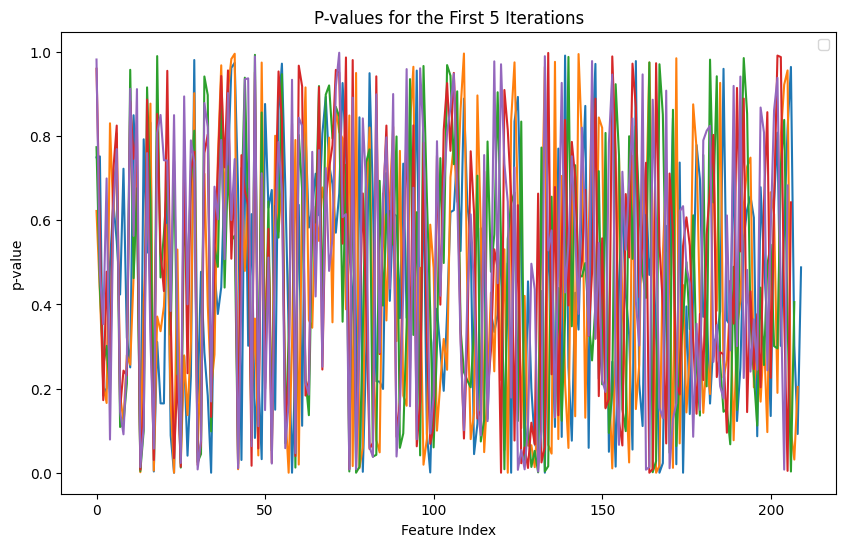

In [128]:

def forward_variable_selection_cri(X_all, y, alpha=0.05):
    """
    Perform forward variable selection based on criteria involving p-values.
    
    Parameters:
    - X_all: The complete feature set.
    - y: The target variable.
    - alpha: The significance level for including a feature.
    
    Returns:
    - A tuple containing the list of selected features and a list of p-value iterations.
    """
    # Initialize lists to store selected features and remaining features
    selected_features = []
    remaining_features = list(range(X_all.shape[1]))
    resids = y.copy()
    p_values_iterations = []

    # Iterate until there are no remaining features
    while len(remaining_features) > 0:
        p_values = []

        # Test each remaining feature
        for feature in remaining_features:
            X = X_all[:, [feature]]
            regr = LinearRegression(fit_intercept=True)
            regr.fit(X, resids)
            residuals = resids - regr.predict(X)
            sigma2 = np.var(residuals, ddof=1)
            se = np.sqrt(sigma2 / (X.T @ X))
            value_t = np.abs(regr.coef_ / se)
            p_value = 2 * (1 - t.cdf(value_t, df=len(resids) - 1))
            p_values.append(p_value[0])

        # Find the feature with the minimum p-value
        min_p_value = min(p_values)
        best_feature = remaining_features[p_values.index(min_p_value)]

        # If the best feature's p-value is below the threshold, add it to the selected features
        if min_p_value < alpha:
            X = X_all[:, [best_feature]]
            regr.fit(X, resids)
            resids = resids - regr.predict(X)
            selected_features.append(remaining_features.pop(p_values.index(min_p_value)))
            p_values_iterations.append(p_values.copy())
        else:
            break

    return selected_features, p_values_iterations

def plot_p_values(p_values_iterations):
    """
    Plot the p-values of the first 5 iterations of the forward variable selection.
    
    Parameters:
    - p_values_iterations: A list of p-value lists from the first 5 iterations.
    """
    plt.figure(figsize=(10, 6))

    # Plot p-values for each iteration
    for i in range(5):
        plt.plot(
            range(len(p_values_iterations[i])), 
            p_values_iterations[i], 
            
        )

    plt.xlabel('Feature Index')
    plt.ylabel('p-value')
    plt.legend()
    plt.title('P-values for the First 5 Iterations')
    plt.show()

# Perform forward variable selection and print selected variables
selected_variables, p_values_iterations = forward_variable_selection_cri(
    X_train_std, y_train
)
print("Selected Variables:", selected_variables)
print(len(selected_variables))

# Plot the p-values for the first 5 iterations of variable selection
plot_p_values(p_values_iterations)


+ The function iteratively adds the variable with the smallest p-value to the set of selected variables, removes it from consideration for future iterations, and adjusts the residuals accordingly. The process stops when the smallest p-value in a given iteration exceeds the threshold of 0.05.

+ The algorithm stops adding new features once the smallest p-value in an iteration exceeds 0.05. This threshold is a common choice in statistical tests and implies that we are only including variables that have a statistically significant relationship with the dependent variable at the 5% significance level.

+ The p-value represents the probability of observing a coefficient as extreme as the one estimated if the null hypothesis (that the coefficient is zero) were true. 

+ By selecting the feature with the smallest p-value, we are choosing the feature that has the strongest evidence against the null hypothesis, i.e., the feature that seems most likely to have a real effect on the dependent variable.

+ The output list "Selected Variables" contains the indices of the variables that were chosen in each iteration. These are the variables that has been identified as having the most significant relationships with the target variable.


+ The horizontal axis represents the indices of the features considered in the model.

+ The plot shows a lot of variability in p-values across features, with many features showing p-values high above the traditional alpha level of 0.05, suggesting that many features are not individually significant in predicting the response variable.

+ This plot shows that for each iteration, the feature with the lowest p-value was selected and included in the model, which is why we see a decrease in the number of high peaks as iterations go on.

# PART 3 : Extensions


**4.Run ridge regression using scikit-learn on the training set. Run the code for 30 different values of the penalty parameter, which should be on a logarithmic scale between 10´1 and 106. Display two subplots at the end:**

**4.a The first subplot should show the evolution of the coefficients for each different value of the penalty parameter.**

**4.b The second subplot should display the evolution of the R-squared coefficient at each of the 30 iterations.**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


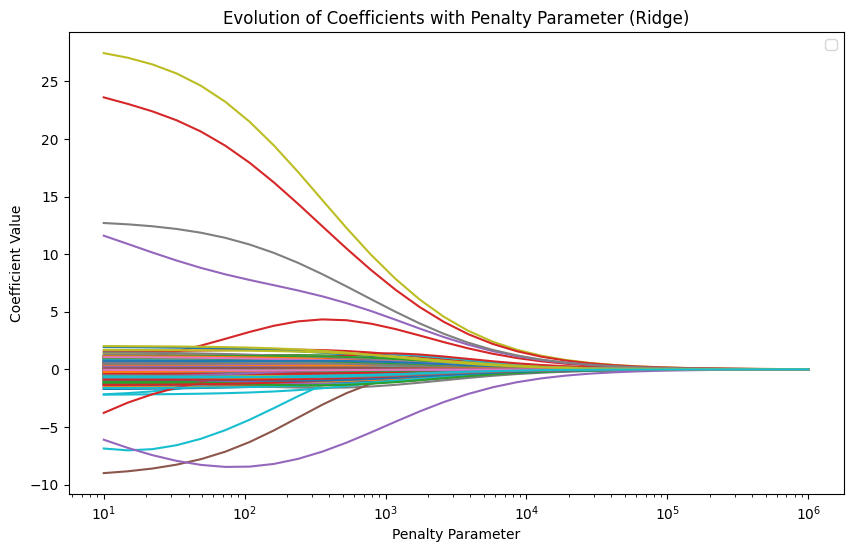

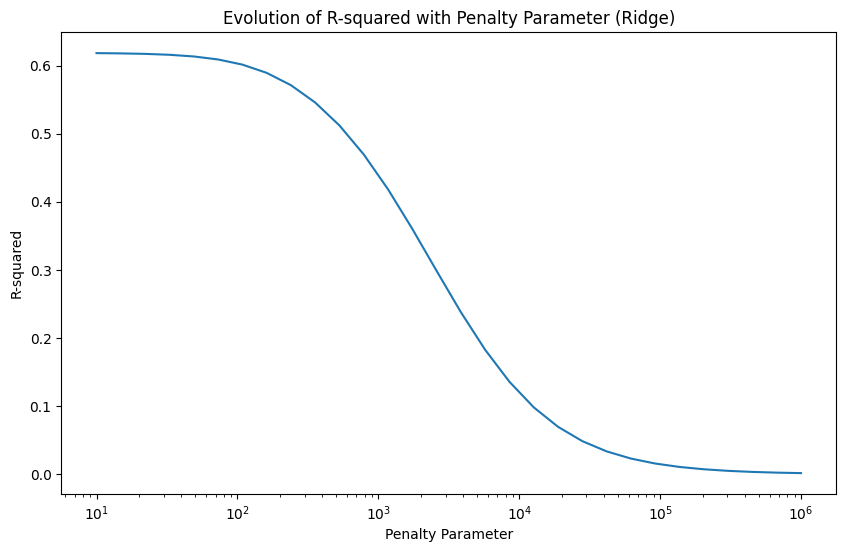

In [56]:
# Define the range of penalty parameters
penalty_params = np.logspace(1, 6, num=30)

# Initialize an empty list to store the coefficients
coefficients = []

# Standardize the training set
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Run ridge regression for each penalty parameter
for alpha in penalty_params:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)
    coefficients.append(ridge.coef_)

# Convert the coefficients list to a numpy array
coefficients = np.array(coefficients)

# Plot the evolution of the coefficients
plt.figure(figsize=(10, 6))
for i in range(coefficients.shape[1]):
    plt.plot(penalty_params, coefficients[:, i])
plt.xscale('log')
plt.xlabel('Penalty Parameter')
plt.ylabel('Coefficient Value')
plt.title('Evolution of Coefficients with Penalty Parameter (Ridge)')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()

# Initialize an empty list to store the R-squared values
r_squared_values = []

# Run ridge regression for each penalty parameter again
for alpha in penalty_params:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)
    y_pred = ridge.predict(X_train_scaled)
    r_squared = ridge.score(X_train_scaled, y_train)
    r_squared_values.append(r_squared)

# Plot the evolution of the R-squared coefficient
plt.figure(figsize=(10, 6))
plt.plot(penalty_params, r_squared_values)
plt.xscale('log')
plt.xlabel('Penalty Parameter')
plt.ylabel('R-squared')
plt.title('Evolution of R-squared with Penalty Parameter (Ridge)')
plt.show()


+ When the penalty parameter is small (left-hand side of graph), the coefficients can take on relatively large values in absolute terms. This suggests little or no penalty applied to the coefficients, which allows for a more flexible fit but can lead to overfitting on the training data.
As the penalty parameter increases, the absolute values of the coefficients decrease, converging to zero in many cases. This demonstrates the regularization effect of the Ridge model: by increasing the penalty, the model becomes less flexible, which can help prevent overfitting and improve generalization on unseen data.

+ When the penalty parameter is low, the R-squared is relatively high, indicating that the model fits the data well. However, if the R-squared is too high for very low penalty values, this could indicate overfitting. As the penalty parameter increases, the R-squared decreases, meaning that the model's ability to explain the variance in the training data decreases. This is due to the reduction in coefficients, which limits the complexity of the model.

+ To wrap things up, this shows the trade-off between bias and variance in the Ridge model's parameter settings.

**Since we are going to perform similar tasks for Lasso and Elastic Net, it is mandatory to write this
code as an independent function that can be parameterized for each specific case.**

**5. Run the code for Lasso as explained in Point 4. Run the code for 30 different values of the penalty parameter, which should be on a logarithmic scale between 10´3 and 102**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


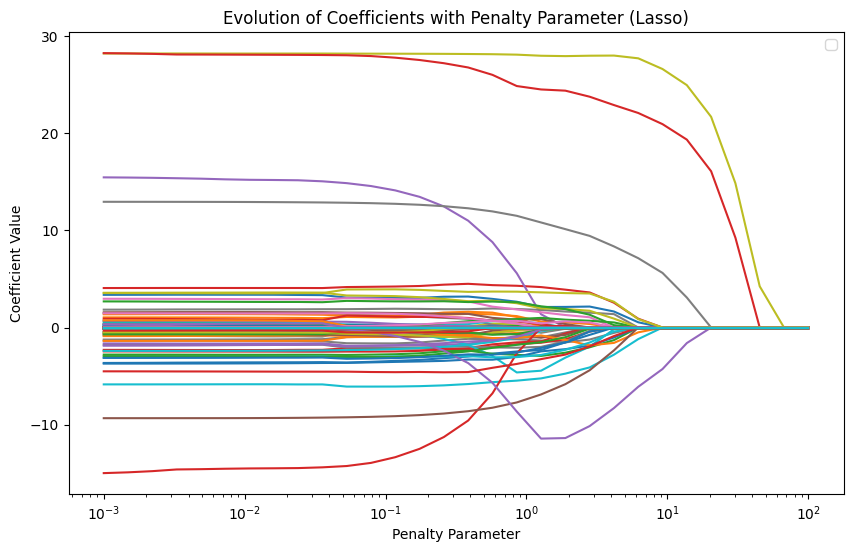

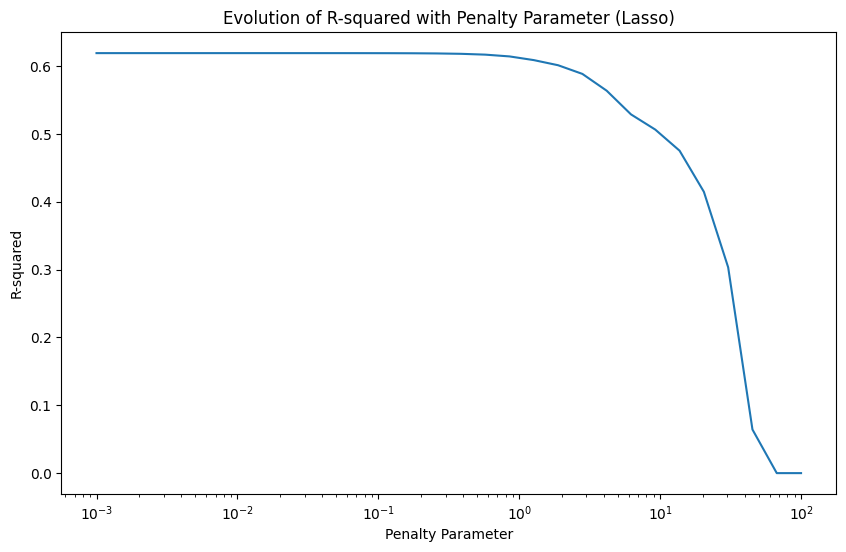

In [57]:
def run_lasso_regression(X_train_scaled, y_train, penalty_params):
    """
    Run Lasso regression for a range of penalty parameters and return the coefficients.
    
    Parameters:
    - X_train_scaled: The standardized training data.
    - y_train: The target values.
    - penalty_params: A list of penalty parameters to iterate over.
    
    Returns:
    - A numpy array of coefficients for each penalty parameter.
    """
    # Initialize an empty list to store the coefficients
    coefficients = []

    # Run Lasso regression for each penalty parameter
    for alpha in penalty_params:
        lasso = Lasso(alpha=alpha, max_iter=100000)
        lasso.fit(X_train_scaled, y_train)
        coefficients.append(lasso.coef_)

    # Convert the coefficients list to a numpy array
    coefficients = np.array(coefficients)

    return coefficients

# Define the range of penalty parameters for Lasso
penalty_params = np.logspace(-3, 2, num=30)

# Run Lasso regression and store the coefficients
lasso_coefficients = run_lasso_regression(X_train_scaled, y_train, penalty_params)

# Plot the evolution of the coefficients
plt.figure(figsize=(10, 6))
for i in range(lasso_coefficients.shape[1]):
    plt.plot(penalty_params, lasso_coefficients[:, i])
plt.xscale('log')
plt.xlabel('Penalty Parameter')
plt.ylabel('Coefficient Value')
plt.title('Evolution of Coefficients with Penalty Parameter (Lasso)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Initialize an empty list to store the R-squared values
r_squared_values = []

# Run Lasso regression for each penalty parameter to evaluate R-squared
for alpha in penalty_params:
    lasso = Lasso(alpha=alpha, max_iter=100000)
    lasso.fit(X_train_scaled, y_train)
    r_squared = lasso.score(X_train_scaled, y_train)
    r_squared_values.append(r_squared)

# Plot the evolution of the R-squared values
plt.figure(figsize=(10, 6))
plt.plot(penalty_params, r_squared_values)
plt.xscale('log')
plt.xlabel('Penalty Parameter')
plt.ylabel('R-squared')
plt.title('Evolution of R-squared with Penalty Parameter (Lasso)')
plt.show()


+ For small penalty parameters (towards the left of the graph), the coefficients are relatively large, indicating that the model is more complex and fits the training data closely. This could potentially lead to overfitting if the penalty is too low. As the penalty parameter increases, the coefficients are progressively driven towards zero. This is a distinctive feature of Lasso regression, which not only penalizes the size of the coefficients but can also set some of them exactly to zero, thus performing feature selection. When the penalty parameter is very high (towards the right of the graph), many coefficients are exactly zero, indicating that the model has become very simple and most features are not contributing to the model. This could potentially lead to underfitting, where the model is too simple to capture the patterns in the data.

+ When the penalty is very low, the R-squared value is high, suggesting that the model fits the data well. However, if the penalty is too low, it may be capturing too much noise, leading to overfitting. As the penalty increases, the R-squared value decreases, indicating that the model's fit to the data is weakening. This is because the increased penalty is reducing the complexity of the model, which might be beneficial if the initial model was overfitting. When the penalty parameter becomes too high, the R-squared value drops sharply, suggesting that the model is no longer able to capture the underlying relationship in the data effectively due to too much regularization, which could be a sign of underfitting.

+ In Lasso regression, as the penalty parameter increases, some coefficients are driven exactly to zero. This is visible in the graph where multiple coefficient trajectories hit the zero line and remain there across different penalty values. This effect is due to the L1 penalty. In the Ridge regression, on the other hand, uses an L2 penalty that squares the coefficient values in the penalty term. This leads to a situation where coefficients are shrunk towards zero but not exactly set to zero.

+ Finally, we can see in the Lasso that the R-squared value often remains relatively stable over a range of penalty values before it starts to decrease.  The model's complexity is reduced without significantly compromising its explanatory power. This phase is valuable because it suggests a range of penalty values where the model is likely not overfit and may generalize well to unseen data. 

**6.Run the code for ElasticNet as explained in Point 4. Run the code for 30 different values of the penalty parameter, which should be on a logarithmic scale between 10´3 and 102.**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


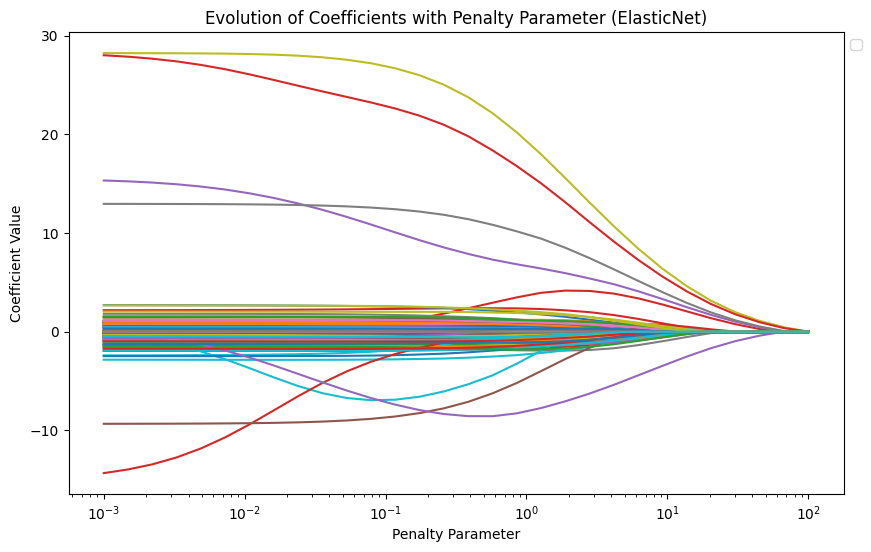

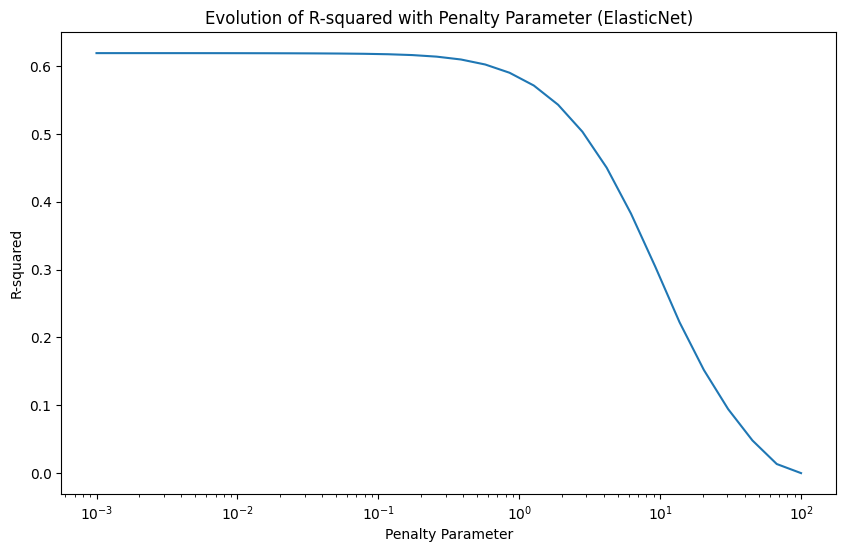

In [120]:
# Define the range of penalty parameters
penalty_params = np.logspace(-3, 2, num=30)

# Initialize an empty list to store the coefficients
coefficients = []

# Standardize the training set
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Run ElasticNet regression for each penalty parameter
for alpha in penalty_params:
    elastic_net = ElasticNet(alpha=alpha, max_iter=100000)
    elastic_net.fit(X_train_scaled, y_train)
    coefficients.append(elastic_net.coef_)

# Convert the coefficients list to a numpy array
coefficients = np.array(coefficients)

# Plot the evolution of the coefficients
plt.figure(figsize=(10, 6))
for i in range(coefficients.shape[1]):
    plt.plot(penalty_params, coefficients[:, i])
plt.xscale('log')
plt.xlabel('Penalty Parameter')
plt.ylabel('Coefficient Value')
plt.title('Evolution of Coefficients with Penalty Parameter (ElasticNet)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# Initialize an empty list to store the R-squared values
r_squared_values = []

# Correctly use ElasticNet in the loop description
# Run ElasticNet regression for each penalty parameter
for alpha in penalty_params:
    elastic_net = ElasticNet(alpha=alpha, max_iter=100000)
    elastic_net.fit(X_train_scaled, y_train)
    y_pred = elastic_net.predict(X_train_scaled)
    r_squared = elastic_net.score(X_train_scaled, y_train)
    r_squared_values.append(r_squared)

# Plot the evolution of the R-squared coefficient
plt.figure(figsize=(10, 6))
plt.plot(penalty_params, r_squared_values)
plt.xscale('log')
plt.xlabel('Penalty Parameter')
plt.ylabel('R-squared')
plt.title('Evolution of R-squared with Penalty Parameter (ElasticNet)')
plt.show()


+ Like Lasso, Elastic Net can reduce some coefficients to exactly zero, which can be seen as some lines in the graph drop to zero and stay there. However, due to the influence of the Ridge penalty, not all coefficients may reach zero, and some are just shrunk towards zero, as indicated by the trajectories that approach but do not touch the zero line. Elastic Net aims to combine the benefits of both Ridge and Lasso: it can perform feature selection while also managing multicollinearity between variables.

+ The R-squared graph for the Elastic Net model initially shows a stable or slightly decreasing R-squared value as the penalty parameter increases, indicating that the model is maintaining its explanatory power despite the introduction of penalties. This suggests that Elastic Net can effectively reduce model complexity without severely impacting its performance, up to a certain point.

# PART 4 : PCR



**7.Compute the singular value decomposition of the covariance matrix. For consistency in the notation use U, s, V = SVD (XTX).**

**7.a Plot a heatmap of the covariance matrix.**

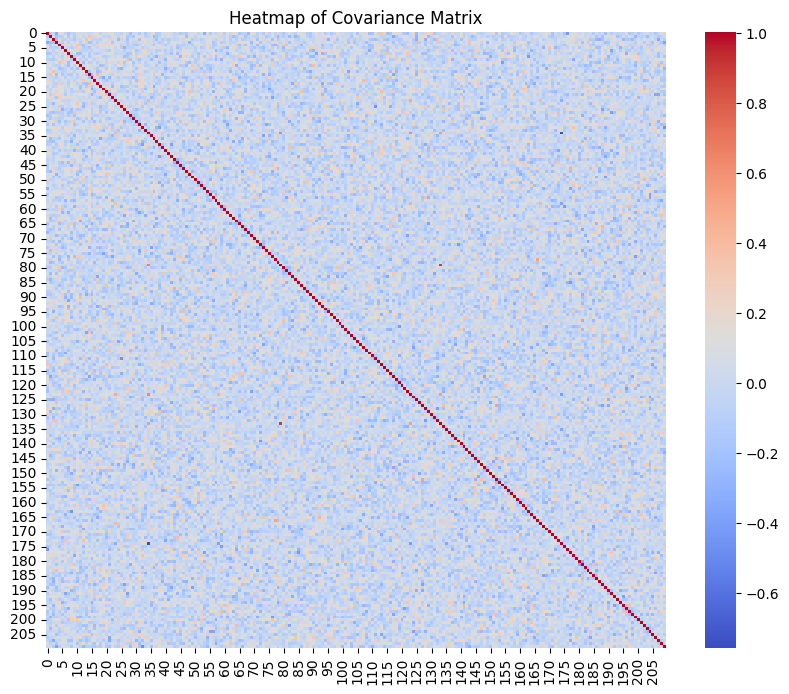

In [97]:
# Compute the covariance matrix
cov_matrix = np.cov(X_train_scaled.T)

# Plot a heatmap of the covariance matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cov_matrix, cmap='coolwarm')
plt.title('Heatmap of Covariance Matrix')
plt.show()

+ The pattern that we see in the heatmap suggests that there is very little covariance between different features since most of the off-diagonal elements are showing colors close to zero (the center of the color scale). This could mean that the features are mostly uncorrelated with each other.

**7.b Compute the PCA for the data using the SVD**

In [122]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Compute the Singular Value Decomposition (SVD) of the standardized data
U, S, V = np.linalg.svd(X_train_scaled)

# Compute the principal components by projecting the standardized data
principal_components = np.dot(X_train_scaled, V.T)

# Compute the explained variance from the singular values
explained_variance = (S ** 2) / np.sum(S ** 2)

# Select the number of principal components to retain
num_components = 2

# Project the data onto the first `num_components` principal components
projected_data = np.dot(X_train_scaled, V.T[:, :num_components])

# Uncomment the line below to print the projected data
# print(projected_data)


**7.cPlot the amount of variance explained by the first k components for k P 2..p. How many variables do we need to explain more than 90% of the variance?**

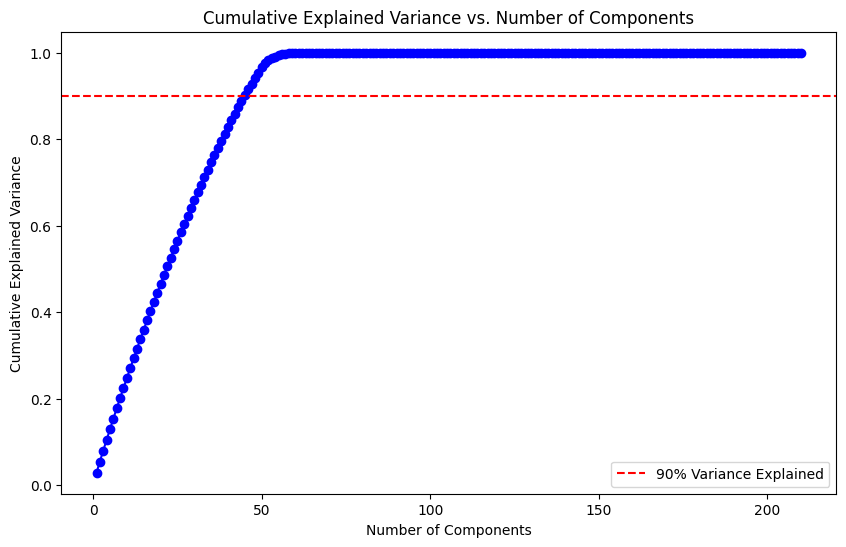

Number of components to explain more than 90% of the variance: 45


In [105]:
# Calculate the cumulative sum of explained variance
cumulative_explained_variance = np.cumsum(explained_variance)

# Plot the variance explained by the first k components
plt.figure(figsize=(10, 6))
plt.plot(
    range(1, len(cumulative_explained_variance) + 1),
    cumulative_explained_variance, marker='o', linestyle='-', color='b'
)
plt.axhline(y=0.9, color='r', linestyle='--', label='90% Variance Explained')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.legend()
plt.show()

# Determine the number of components needed to explain more than 90% of the variance
num_components_90_percent = np.argmax(cumulative_explained_variance >= 0.9) + 1
print(f"Number of components to explain more than 90% of the variance: {num_components_90_percent}")


+ From the plot and the output, we can conclude that if we wanted to compress or reduce the dimensionality of the dataset, weu could use only the 45 principal components to retain more than 90% of the data's original variance. 

**7.d Plot the projected data with k “ 2 using as color the value of y and interpret the plot**

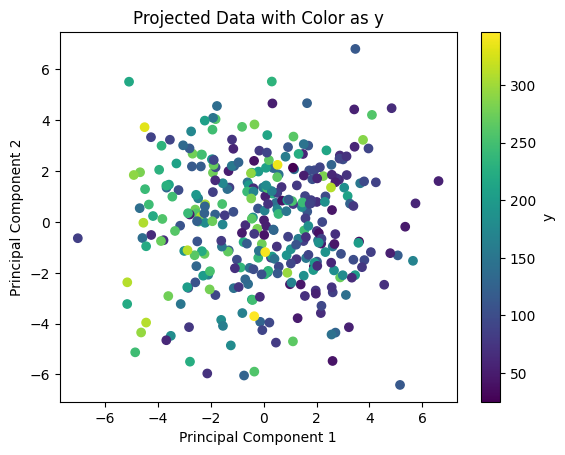

In [19]:
# Project the data onto the first two principal components
num_components = 2
projected_data = np.dot(X_train_scaled, V.T[:, :num_components])

# Plot the projected data with y_train values as color indicators
plt.scatter(projected_data[:, 0], projected_data[:, 1], c=y_train)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Projected Data with Color as y')
plt.colorbar(label='y')
plt.show()

+ Each point in the scatter plot corresponds to a single observation in the dataset. The position of the point is determined by the values of the first two principal components for that observation. The color of each point represents the value of the response variable y for that observation. The color scale on the right side of the plot provides a reference for the value of  y that each color represents.

+ The spread of the points shows how the observations are distributed in the space defined by the first two principal components. It seems there are  apparent clusters that they may indicate groupings or patterns in the data related to the response variable.


**7.e Plot the the two first principal directions**

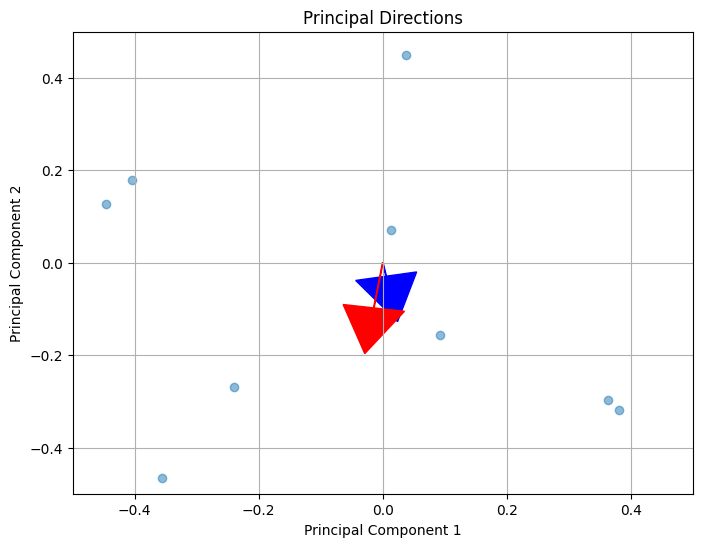

In [123]:
# Plot the first two principal directions
plt.figure(figsize=(8, 6))
# Plot the projected data with transparency
plt.scatter(projected_data[:, 0], projected_data[:, 1], alpha=0.5)

# Draw arrows representing the principal directions
plt.arrow(
    0, 0, V[0, 0], V[1, 0], 
    head_width=0.1, head_length=0.1, 
    fc='blue', ec='blue'
)
plt.arrow(
    0, 0, V[0, 1], V[1, 1], 
    head_width=0.1, head_length=0.1, 
    fc='red', ec='red'
)

# Set the plot limits
plt.xlim(-0.5, 0.5)
plt.ylim(-0.5, 0.5)

# Label the axes and add a title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Principal Directions')

# Enable the grid for better visualization
plt.grid(True)
plt.show()


+ The arrows represent the directions of maximum variance within the data. The blue arrow corresponds to the first principal component, which is the direction along which the data has the greatest variance. The red arrow represents the second principal component, which is orthogonal to the first and represents the next greatest direction of variance.

**7.f Run OLS on the projected data (PCR) using k components for k ă 50. Select the k that returns the best score of the OLS model and plot the evolution of the scores with k.**

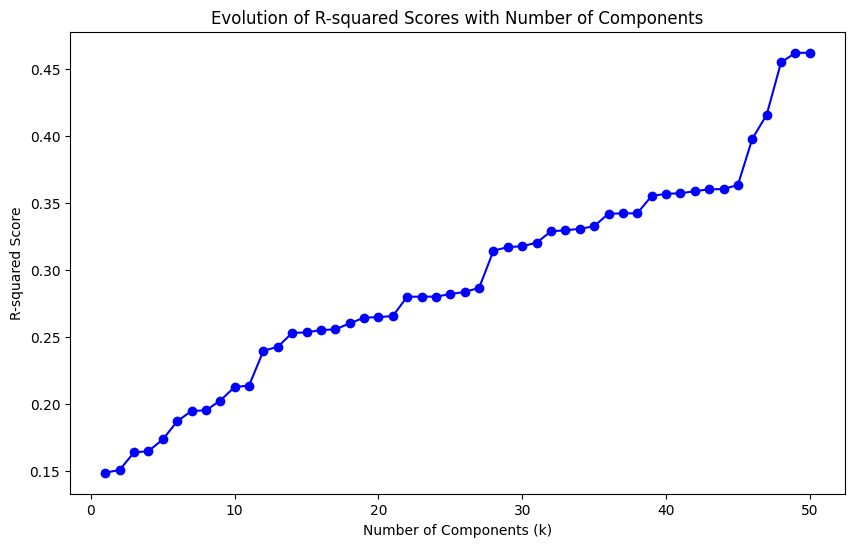

Best k: 50
Best R-squared score: 0.4619196994932985


In [124]:
scores = []
best_score = 0
best_k = 0

for k in range(1, 51):
    # Project the data onto the first k principal components
    projected_data = np.dot(X_train_scaled, V.T[:, :k])
    
    # Fit the OLS (Ordinary Least Squares) model
    ols_model = LinearRegression()
    ols_model.fit(projected_data, y_train)
    
    # Predict the target variable using the trained model
    y_pred = ols_model.predict(projected_data)
    
    # Calculate the R-squared score for model evaluation
    score = r2_score(y_train, y_pred)
    scores.append(score)
    
    # Update the best score and corresponding k value if the current score is higher
    if score > best_score:
        best_score = score
        best_k = k

# Plot the evolution of the R-squared scores as a function of k
plt.figure(figsize=(10, 6))
plt.plot(range(1, 51), scores, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Components (k)')
plt.ylabel('R-squared Score')
plt.title('Evolution of R-squared Scores with Number of Components')
plt.show()

# Print the best number of components (k) and the corresponding R-squared score
print(f"Best k: {best_k}")
print(f"Best R-squared score: {best_score}")


+ The plot shows a general increasing trend in the R-squared scores as more principal components are included. This suggests that as more components are used, the model is better able to capture the variance in the target variable.

+ The best_k reported is 50 (actually is 49 because needs to be strictly < than 50, according to the question), which is the maximum number of components tested. This result indicates that including all 50 components gives the best R-squared score of approximately 0.462.

+ While adding more components generally improves the model's performance, it also increases the model's complexity. In practice, we would look for a balance between a good R-squared score and a simpler model (tradeoff). However, the plot suggests that even with increased complexity (up to 50 components), the R-squared score does not reach a particularly high value.



# PART 5 : Comparison of the models



**8. Summarize the results of the models and elaborate in their main characteristics. Plot all the training and testing errors for all the models considered and elaborate on the results.**

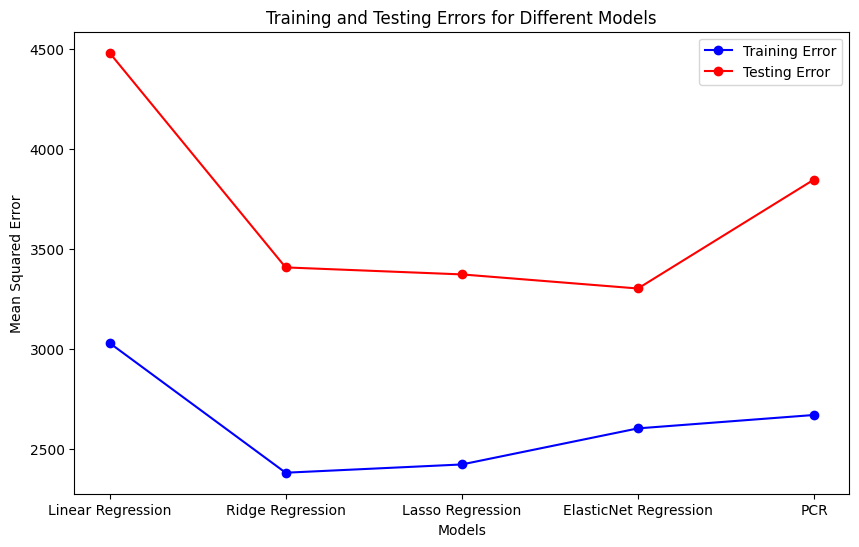

In [125]:

# Initialize empty lists to store the training and testing errors
training_errors = []
testing_errors = []

models = [
    'Linear Regression', 'Ridge Regression',
    'Lasso Regression', 'ElasticNet Regression', 'PCR'
]

for model_name in models:
    if model_name == 'Linear Regression':
        # Fit the Linear Regression model on the training data
        model = LinearRegression()
    elif model_name == 'Ridge Regression':
        # Fit the Ridge Regression model on the training data
        model = Ridge(alpha=1.0)
    elif model_name == 'Lasso Regression':
        # Fit the Lasso Regression model on the training data
        model = Lasso(alpha=1.0)
    elif model_name == 'ElasticNet Regression':
        # Fit the ElasticNet Regression model on the training data
        model = ElasticNet(alpha=1.0, l1_ratio=0.5)
    elif model_name == 'PCR':
        # Fit the PCR model on the training data
        model = LinearRegression()
    
    # Train the model and predict for training and testing sets
    if model_name == 'PCR':
        model.fit(X_train_scaled, y_train)
        y_train_pred = model.predict(X_train_scaled)
        y_test_pred = model.predict(X_test_std)
    else:
        train_input = X_train_std if model_name != 'Linear Regression' else X_train
        test_input = X_test_std if model_name != 'Linear Regression' else X_test
        model.fit(train_input, y_train)
        y_train_pred = model.predict(train_input)
        y_test_pred = model.predict(test_input)

    # Calculate the training and testing errors
    training_error = mean_squared_error(y_train, y_train_pred)
    testing_error = mean_squared_error(y_test, y_test_pred)

    # Append the errors to the respective lists
    training_errors.append(training_error)
    testing_errors.append(testing_error)

# Plot the training and testing errors for all models
plt.figure(figsize=(10, 6))
plt.plot(models, training_errors, marker='o', linestyle='-', color='b',
         label='Training Error')
plt.plot(models, testing_errors, marker='o', linestyle='-', color='r',
         label='Testing Error')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.title('Training and Testing Errors for Different Models')
plt.legend()
plt.show()


+ The ElasticNet Regression model seems to be the best performing model among those tested, as it has the lowest testing error, which is the primary indicator of how well the model will perform on unseen data.

+ The difference between training and testing errors for ElasticNet is also the smallest, indicating that it is balancing bias and variance effectively.

+ Ridge and Lasso Regression also show good performance, with testing errors comparable to ElasticNet, but ElasticNet has a slight edge.

+ The PCR model, despite its low training error, is likely overfitting due to its high testing error. It's capturing too much complexity in the training data that does not apply to the test data.

+ In conclusion, ElasticNet Regression appears to be the optimal choice among the models tested. It strikes the best balance between R-squared (computed before) and MSE, making it the preferred model for this particular dataset.


$\textbf{ ------------------------------------------------------------------------THE END------------------------------------------------------------------------------------}$
